# **Get the data**

In [ ]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Get the Data
from google.colab import files
df = pd.read_csv("data_students.csv", sep=';')
# Delete the lines with the output we do not need
#df = df[df['Target'] != 'Enrolled']
#Print the first 5 rows of the dataframe.
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# **Visualize the data**

In [ ]:
# Check for missing values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
#Number of lines and columns
df.shape

(4424, 37)

In [ ]:
#check the number of occurences of each outcome
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [ ]:
#Compute pairwise correlation of columns
df_new=pd.get_dummies(df) #Transform the column "Target" in numerical values
corr=df_new.corr()
corr.style.background_gradient(cmap='coolwarm')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,0.093712,-0.020214,-0.072001
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,0.198458,0.030247,-0.208550
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,-0.070485,-0.036280,0.093670
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,-0.033676,0.002758,0.029333
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,-0.080499,0.022073,0.058235
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,0.014822,0.016263,0.184183,-0.115188,-0.010461,0.095104,-0.068453,0.078684,-0.070513,0.156234,-0.026226,0.166025,0.078702,0.130597,0.022020,-0.000497,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,0.049379,0.009529,-0.053427
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,-0.011415,-0.019284,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,-0.078208,-0.049826,0.111278
Nationality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,0.043187,0.020626,0.028176,-0.007448,-0.005982,0.051989,-0.026115,-0.023258,-0.010490,-0.003647,0.790935,-0.000370,-0.013292,-0.007763,-0.002268,0.000869,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,

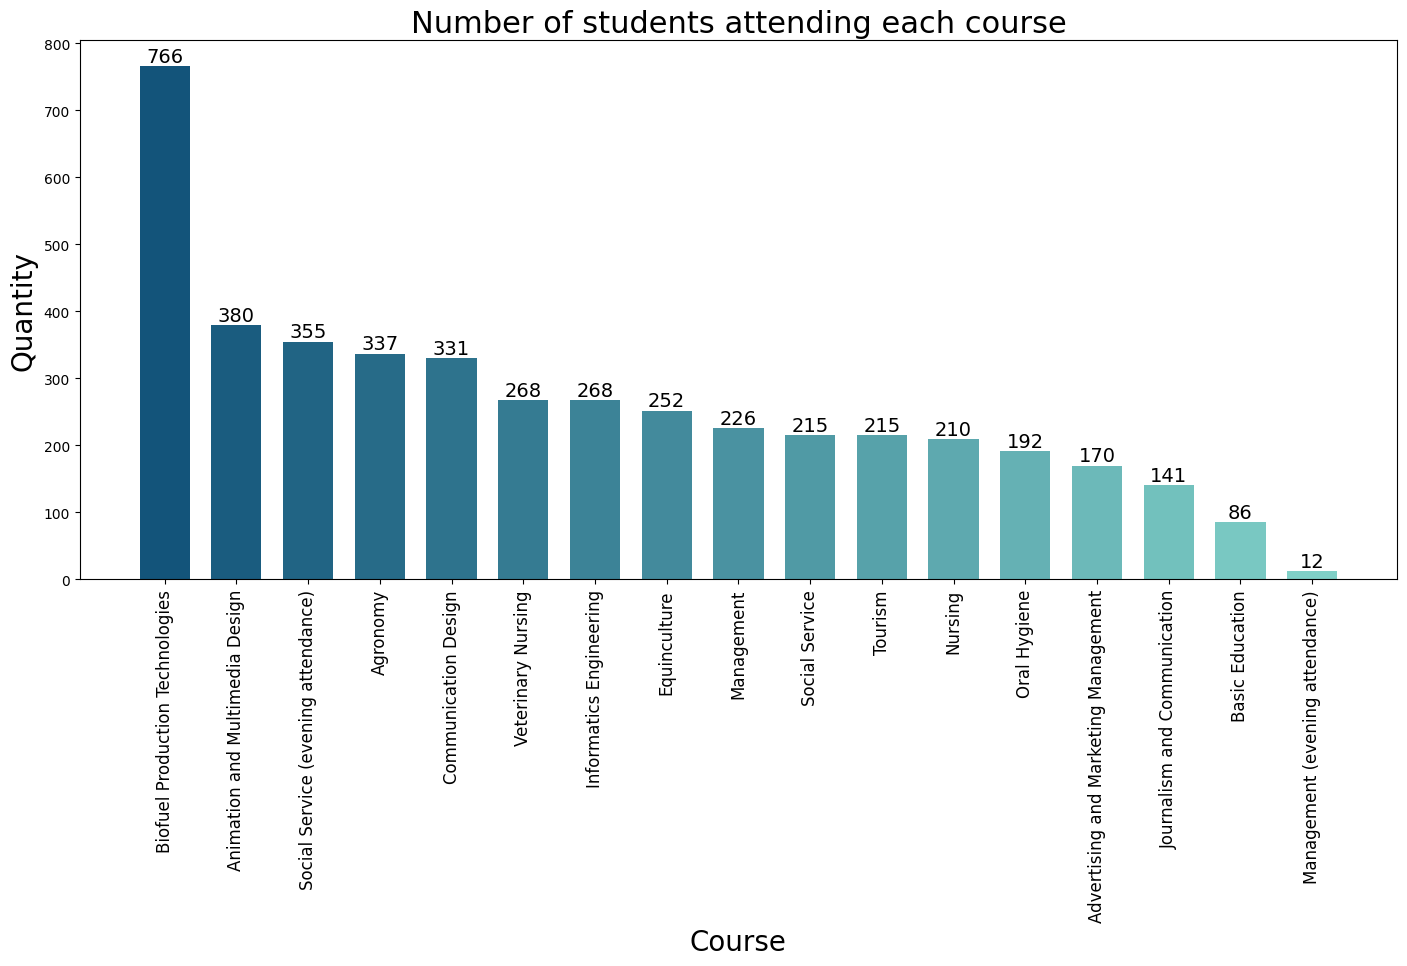

In [ ]:
#Display a graph that shows the number of students attending each course

from matplotlib.colors import LinearSegmentedColormap
import textwrap
#Obtain total number of students for each course
courses = df['Course'].value_counts()
m_height = courses.values.tolist() #Provides numerical values
courses_labels = ['Biofuel Production Technologies','Animation and Multimedia Design', 'Social Service (evening attendance)','Agronomy',
                      'Communication Design', 'Veterinary Nursing', 'Informatics Engineering','Equinculture',
                     'Management', 'Social Service','Tourism','Nursing','Oral Hygiene','Advertising and Marketing Management',
                      'Journalism and Communication','Basic Education','Management (evening attendance)'] #Converts index object to list

ind = np.arange(17)  # the x locations for the groups
width = 0.7        # the width of the bars

fig, ax = plt.subplots(figsize=(17,7))
# Create a gradient color map
colors = ['#13547a', '#80d0c7']  # hexa values for the start and end colors
cmap = LinearSegmentedColormap.from_list('custom_gradient', colors, N=len(courses_labels))
courses_bars = ax.bar(ind, m_height , width,color=cmap(np.linspace(0, 1, len(courses_labels))))

#Add some text for labels, title and axes ticks
ax.set_xlabel("Course",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Number of students attending each course',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('Biofuel Production Technologies','Animation and Multimedia Design', 'Social Service (evening attendance)','Agronomy',
                      'Communication Design', 'Veterinary Nursing', 'Informatics Engineering','Equinculture',
                     'Management', 'Social Service','Tourism','Nursing','Oral Hygiene','Advertising and Marketing Management',
                      'Journalism and Communication','Basic Education','Management (evening attendance)'),
                  fontsize = 12, rotation=90)


#Put labels on each bar
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)


autolabel(courses_bars)
plt.show() #Display bars.

## **First solution without the grades of the first semester**

# **Preparing the dataset**

In [ ]:
#remove the features we will not use
columns_to_drop=["Scholarship holder","Nationality","Previous qualification (grade)","Mother's qualification","Father's occupation",
                 "Educational special needs","Unemployment rate","Mother's occupation","Admission grade","Displaced",
                 "Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)","Curricular units 1st sem (evaluations)",
                 "Curricular units 1st sem (without evaluations)",
                 "Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (evaluations)",
                 "Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)","Curricular units 2nd sem (without evaluations)",
                 "Curricular units 1st sem (approved)","Curricular units 1st sem (grade)"]
df_new = df.drop(columns=columns_to_drop)
df_new.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Father's qualification,Debtor,Tuition fees up to date,Gender,Age at enrollment,International,Inflation rate,GDP,Target
0,1,17,5,171,1,1,12,0,1,1,20,0,1.4,1.74,Dropout
1,1,15,1,9254,1,1,3,0,0,1,19,0,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,37,0,0,1,19,0,1.4,1.74,Dropout
3,1,17,2,9773,1,1,37,0,1,0,20,0,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,38,0,1,0,45,0,-0.3,0.79,Graduate


# **Train the model**

In [ ]:
from sklearn.model_selection import train_test_split
df_new2=pd.get_dummies(df_new)
df_new2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Father's qualification,Debtor,Tuition fees up to date,Gender,Age at enrollment,International,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,17,5,171,1,1,12,0,1,1,20,0,1.4,1.74,1,0,0
1,1,15,1,9254,1,1,3,0,0,1,19,0,-0.3,0.79,0,0,1
2,1,1,5,9070,1,1,37,0,0,1,19,0,1.4,1.74,1,0,0
3,1,17,2,9773,1,1,37,0,1,0,20,0,-0.8,-3.12,0,0,1
4,2,39,1,8014,0,1,38,0,1,0,45,0,-0.3,0.79,0,0,1


In [ ]:
X = df_new2.iloc[:,:14]
y = df_new2.iloc[:,14]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
#Use the logistic regression on the dataset
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [ ]:
# Predicitions on testing data
yhat_prob = LR.predict_proba(X_test)
predict = np.argmax(yhat_prob, axis = 1)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

# **Evaluate the model performance**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[553  48]
 [210  74]]
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       601
           1       0.61      0.26      0.36       284

    accuracy                           0.71       885
   macro avg       0.67      0.59      0.59       885
weighted avg       0.69      0.71      0.67       885



# **Second solution with the grades of the first semester**

# **Preparing the dataset**

In [ ]:
#remove the features we will not use
columns_to_drop=["Scholarship holder","Nationality","Previous qualification (grade)","Mother's qualification","Father's occupation",
                 "Educational special needs","Unemployment rate","Mother's occupation","Admission grade","Displaced",
                 "Curricular units 1st sem (credited)","Curricular units 1st sem (enrolled)","Curricular units 1st sem (evaluations)",
                 "Curricular units 1st sem (without evaluations)",
                 "Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (evaluations)",
                 "Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)","Curricular units 2nd sem (without evaluations)"]
df_new = df.drop(columns=columns_to_drop)
df_new.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Father's qualification,Debtor,Tuition fees up to date,Gender,Age at enrollment,International,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Inflation rate,GDP,Target
0,1,17,5,171,1,1,12,0,1,1,20,0,0,0.000000,1.4,1.74,Dropout
1,1,15,1,9254,1,1,3,0,0,1,19,0,6,14.000000,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,37,0,0,1,19,0,0,0.000000,1.4,1.74,Dropout
3,1,17,2,9773,1,1,37,0,1,0,20,0,6,13.428571,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,38,0,1,0,45,0,5,12.333333,-0.3,0.79,Graduate


# **Train the model**

In [ ]:
from sklearn.model_selection import train_test_split
df_new2=pd.get_dummies(df_new)
df_new2.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Father's qualification,Debtor,Tuition fees up to date,Gender,Age at enrollment,International,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,17,5,171,1,1,12,0,1,1,20,0,0,0.000000,1.4,1.74,1,0,0
1,1,15,1,9254,1,1,3,0,0,1,19,0,6,14.000000,-0.3,0.79,0,0,1
2,1,1,5,9070,1,1,37,0,0,1,19,0,0,0.000000,1.4,1.74,1,0,0
3,1,17,2,9773,1,1,37,0,1,0,20,0,6,13.428571,-0.8,-3.12,0,0,1
4,2,39,1,8014,0,1,38,0,1,0,45,0,5,12.333333,-0.3,0.79,0,0,1


In [ ]:
X = df_new2.iloc[:,:16]
y = df_new2.iloc[:,16]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
#Use the logistic regression on the dataset
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [ ]:
# Predicitions on testing data
yhat_prob = LR.predict_proba(X_test)
predict = np.argmax(yhat_prob, axis = 1)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,

# **Evaluate the model performance**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[556  45]
 [117 167]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       601
           1       0.79      0.59      0.67       284

    accuracy                           0.82       885
   macro avg       0.81      0.76      0.77       885
weighted avg       0.81      0.82      0.81       885

